# SLIC

### Refer to the article and implement SLIC from scratch.

In [1]:
from q4_equally_spaced_centers import *

In [2]:
import matplotlib.pyplot as plt

### Try to segment the image frame 0000.jpg. Alternatively, choose any image and try segmentation/superpixalation for it using SLIC.

In [3]:
def do_slic(image_path, num_segments, compactness, only_one_image=False, keep_images=False):
    image = cv2.imread(image_path)
    # image = cv2.imread("/home/anshium/workspace/courses/smai/smai-assignment-1/Question_5/more_images/SLIC/2.jpg")
    # image = cv2.imread("/home/anshium/Pictures/wallpapers/Fantasy-Lake2.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    slic = SLIC(image, num_segments, compactness, keep_images)

    slic.iterate()
    segmentation = slic.get_segmentation()

    segmentation_bgr = cv2.cvtColor(segmentation, cv2.COLOR_LAB2BGR)
    # cv2.imwrite("segmentation.jpg", segmentation_bgr)

    segmentation_rgb = cv2.cvtColor(segmentation_bgr, cv2.COLOR_BGR2RGB)

    if(only_one_image):
        plt.figure(figsize=(8, 8))
        plt.imshow(segmentation_rgb)
        plt.axis("off")
        plt.title("Segmented Image")
        plt.show()

    return segmentation_rgb



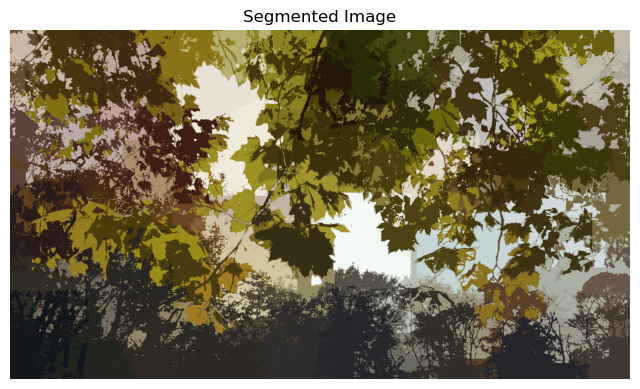

array([[[101,  78,  50],
        [101,  78,  50],
        [101,  78,  50],
        ...,
        [191, 185, 167],
        [191, 185, 167],
        [191, 185, 167]],

       [[101,  78,  50],
        [101,  78,  50],
        [101,  78,  50],
        ...,
        [191, 185, 167],
        [191, 185, 167],
        [191, 185, 167]],

       [[101,  78,  50],
        [101,  78,  50],
        [101,  78,  50],
        ...,
        [191, 185, 167],
        [191, 185, 167],
        [191, 185, 167]],

       ...,

       [[ 19,  22,  27],
        [ 19,  22,  27],
        [ 19,  22,  27],
        ...,
        [ 65,  57,  47],
        [ 65,  57,  47],
        [ 65,  57,  47]],

       [[ 19,  22,  27],
        [ 19,  22,  27],
        [ 19,  22,  27],
        ...,
        [ 65,  57,  47],
        [ 65,  57,  47],
        [ 65,  57,  47]],

       [[ 19,  22,  27],
        [ 19,  22,  27],
        [ 19,  22,  27],
        ...,
        [ 65,  57,  47],
        [ 65,  57,  47],
        [ 65,  57,  47]]

In [8]:
image_path = "data/frame_0000.jpg"

do_slic(image_path, 100, 20, True)

### Change the two hyperparameters: number of clusters and compactness and report the difference they bring.

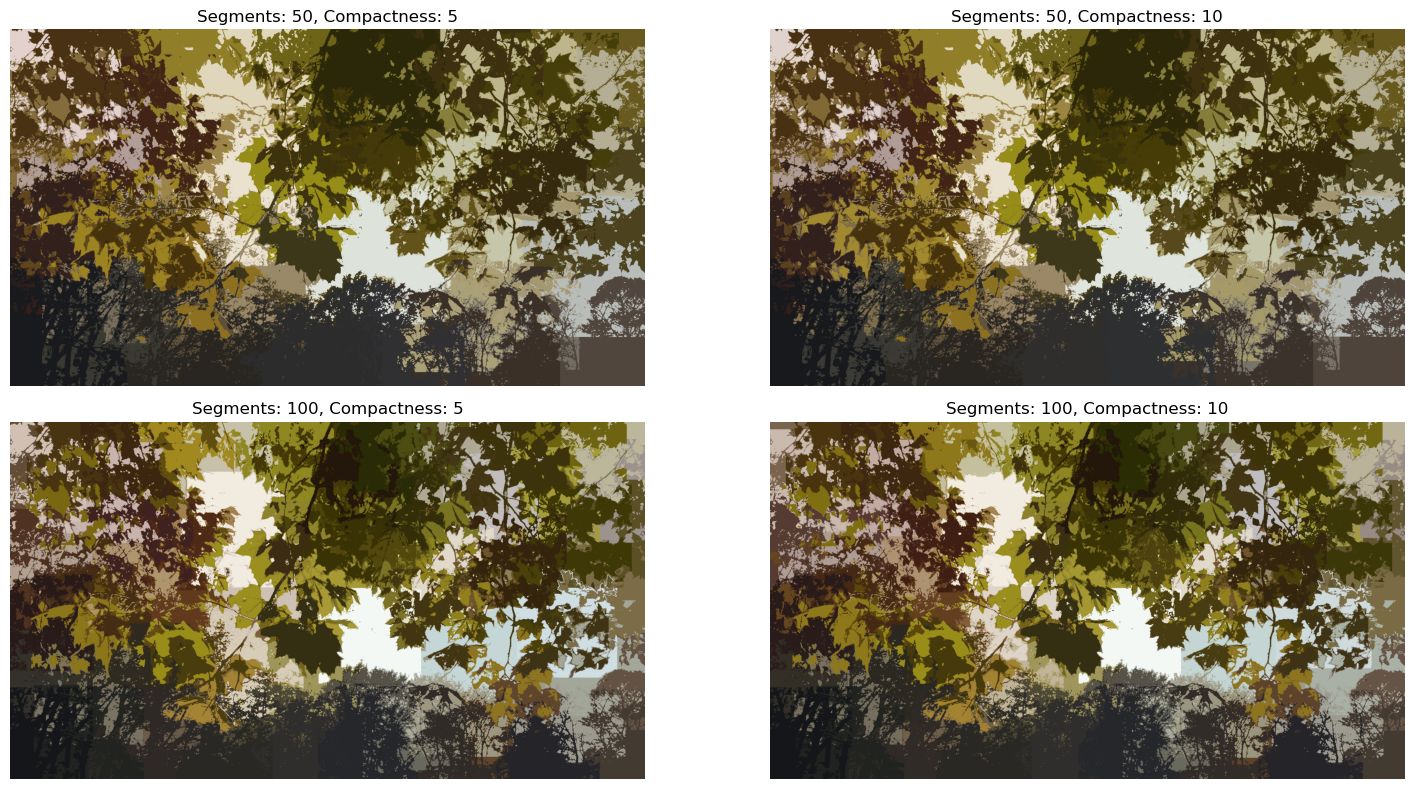

In [13]:
num_segments_values = [50, 100] #, 150, 200]
compactness_values = [5, 10] #, 20, 40]

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
# fig, axs = plt.subplots(4, 4, figsize=(16, 8))

for i, num_segments in enumerate(num_segments_values):
    for j, compactness in enumerate(compactness_values):
        idx = i * 4 + j
        ax = axs[i, j]

        segmented_image = do_slic(image_path, num_segments, compactness)

        ax.imshow(segmented_image)
        ax.axis('off')
        ax.set_title(f"Segments: {num_segments}, Compactness: {compactness}")

plt.tight_layout()
plt.show()

### Display the image after every iteration to qualitatively see the change that happens in every iteration

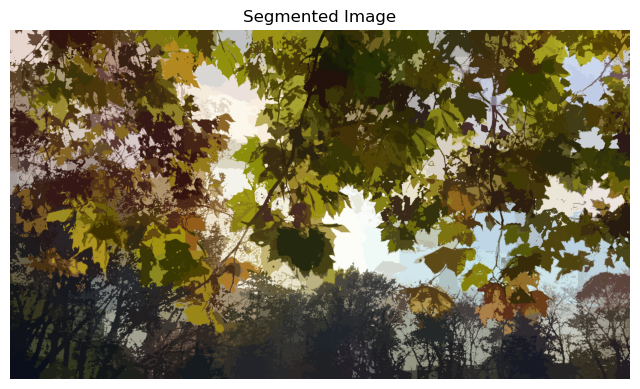

array([[[230, 214, 206],
        [230, 214, 206],
        [230, 214, 206],
        ...,
        [ 82,  64,   7],
        [ 82,  64,   7],
        [ 82,  64,   7]],

       [[230, 214, 206],
        [230, 214, 206],
        [230, 214, 206],
        ...,
        [ 82,  64,   7],
        [ 82,  64,   7],
        [ 82,  64,   7]],

       [[230, 214, 206],
        [230, 214, 206],
        [230, 214, 206],
        ...,
        [ 82,  64,   7],
        [ 82,  64,   7],
        [ 82,  64,   7]],

       ...,

       [[ 11,  15,  27],
        [ 11,  15,  27],
        [ 11,  15,  27],
        ...,
        [ 33,  29,  34],
        [ 33,  29,  34],
        [ 33,  29,  34]],

       [[ 11,  15,  27],
        [ 11,  15,  27],
        [ 11,  15,  27],
        ...,
        [ 33,  29,  34],
        [ 33,  29,  34],
        [ 33,  29,  34]],

       [[ 11,  15,  27],
        [ 11,  15,  27],
        [ 11,  15,  27],
        ...,
        [ 33,  29,  34],
        [ 33,  29,  34],
        [ 33,  29,  34]]

In [6]:
image_path = "data/frame_0000.jpg"

do_slic(image_path, 400, 10, True, True)

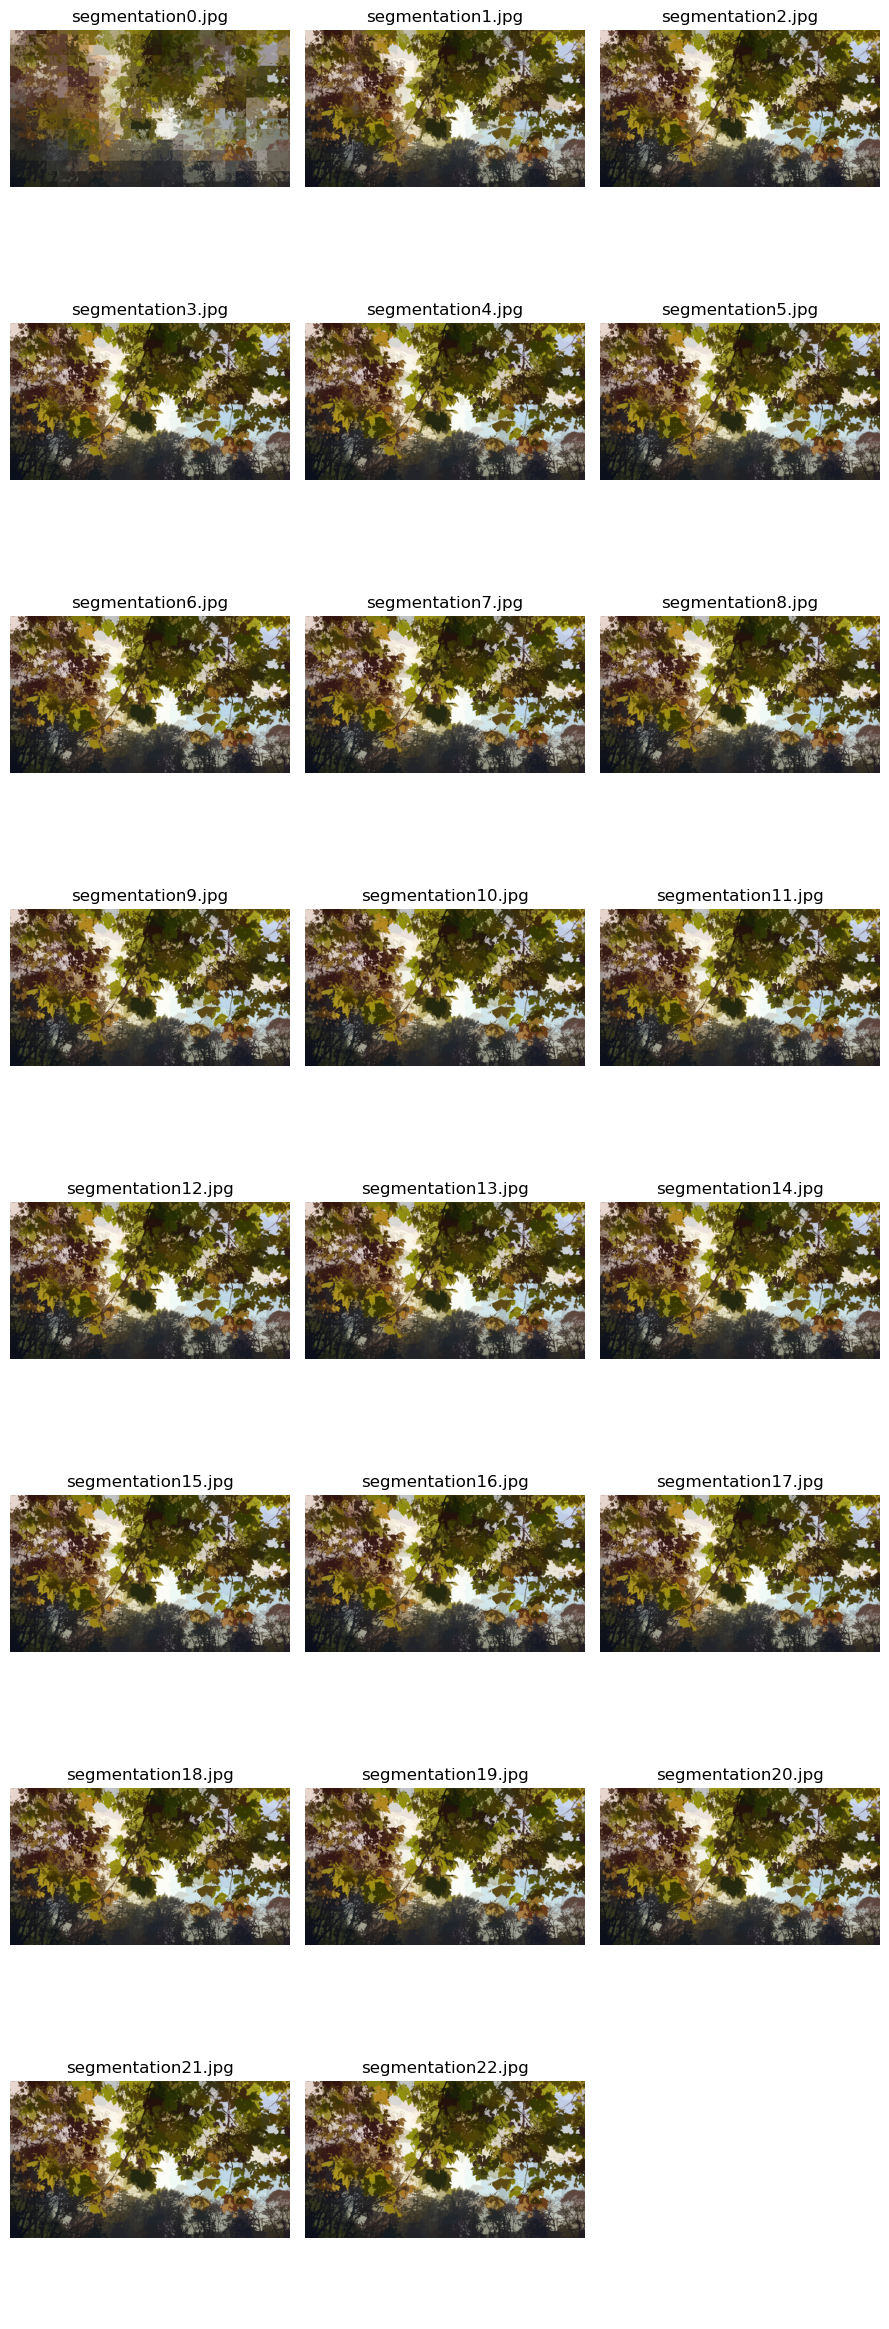

In [ ]:
import os
import re
import matplotlib.pyplot as plt
from PIL import Image

def natural_sort_key(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else float('inf')

def display_images_from_folder(folder_path, cols=3, img_size=(1920, 1080)):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('jpg')]
    
    image_files.sort(key=natural_sort_key)
    
    num_images = len(image_files)
    
    rows = (num_images // cols) + (num_images % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

    axes = axes.flatten() if num_images > 1 else [axes]
    
    for ax, img_file in zip(axes, image_files):
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)

        ax.imshow(img)
        ax.set_title(img_file)
        ax.axis('off')

    for ax in axes[num_images:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

display_images_from_folder("iters")


### As you can see the distance metric used is in Lab Space and not RGB space. Try out the RGB space and report any difference noticed. What might be the reason for it.


In [1]:
from q4_rgb_distance import *

In [2]:
import matplotlib.pyplot as plt

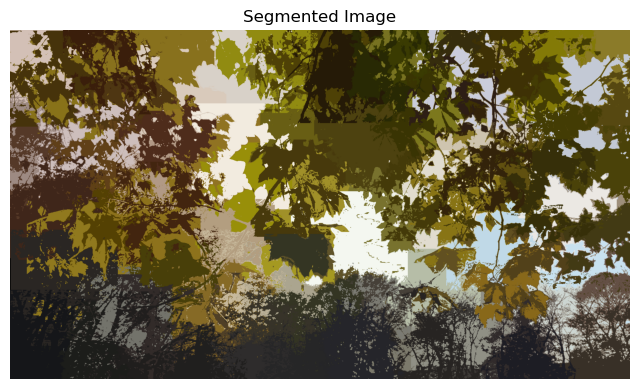

In [3]:
def do_slic_rgb(image_path, num_segments, compactness):
    image = cv2.imread(image_path)
    # image = cv2.imread("/home/anshium/workspace/courses/smai/smai-assignment-1/Question_5/more_images/SLIC/2.jpg")
    # image = cv2.imread("/home/anshium/Pictures/wallpapers/Fantasy-Lake2.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    slic = SLIC_RGB(image, num_segments=num_segments, compactness=compactness)

    slic.iterate()
    segmentation = slic.get_segmentation()

    segmentation_bgr = cv2.cvtColor(segmentation, cv2.COLOR_RGB2BGR)
    segmentation_rgb = cv2.cvtColor(segmentation_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(segmentation_rgb)
    plt.axis("off")
    plt.title("Segmented Image")
    plt.show()


image_path_rgb = "data/frame_0000.jpg"
num_segments = 100
compactness = 20

do_slic_rgb(image_path_rgb, num_segments, compactness)